## Maps

We use the `geopandas` and `geoplot` to plot the map. We use the shapefile from Vietnam Government, with `adm = 1`.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cmasher as cmr
import numpy as np

### Setup

In [2]:
cmap = cmr.get_sub_cmap('Reds', 0.3, 1)

### Timeline: 2017 - 2019

In [3]:
# Load the data
df = pd.read_csv('../Data/province_stat.csv')
gdf = gpd.read_file('../Data/vnm_admbnda_adm1_gov_20201027.shp')

In [4]:
# Some provinces missing the 'city' suffix. We may hardcode it here.

for province in df['Province']:
    if province not in gdf['ADM1_EN'].values:
        df['Province'] = df['Province'].replace(province, province + ' city')

# Some provinces are not in the shapefile. We may add them manually.
for province in gdf['ADM1_EN'].values:
    if province not in df['Province'].values:
        df = pd.concat([df, pd.DataFrame({'Province': [province], 'Patient': [0]})], ignore_index=True)

df = df.sort_values(by='Province', ignore_index=True)

In [5]:
df

,Province,Patient,Percentage
0,An Giang,0,NaN
1,Ba Ria - Vung Tau,1,0.05%
2,Bac Giang,53,2.56%
3,Bac Kan,4,0.19%
4,Bac Lieu,0,NaN
...,...,...,...
58,Tra Vinh,0,NaN
59,Tuyen Quang,17,0.82%
60,Vinh Long,0,NaN
61,Vinh Phuc,75,3.62%


<Axes: >

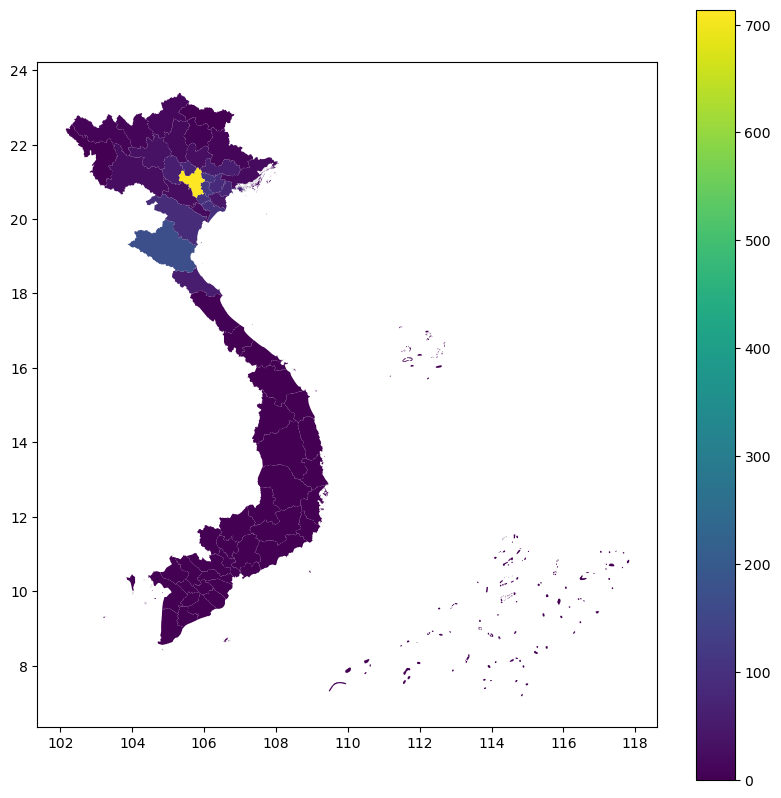

In [6]:
patients = list(df['Patient']) + [0] * (len(gdf) - len(df))
gdf = gdf.sort_values(by='ADM1_EN')

if 'Patient' in gdf.columns:
    gdf = gdf.drop('Patient', axis=1)

gdf.insert(0, 'Patient', patients)

gdf.plot(column='Patient', figsize=(10, 10), legend=True)

### Timeline: 2017

In [7]:
# Load the data
df_years = pd.read_csv('../Data/year_and_province.csv')

In [8]:
# Some provinces missing the 'city' suffix. We may hardcode it here.

for province in df_years['Province']:
    if province not in gdf['ADM1_EN'].values:
        df_years['Province'] = df_years['Province'].replace(province, province + ' city')

# Some provinces are not in the shapefile. We may add them manually.
for province in gdf['ADM1_EN'].values:
    if province not in df_years['Province'].values:
        df_years = pd.concat([df_years, pd.DataFrame({'Province': [province], '2017': [0], '2018': [0], '2019': [0]})], ignore_index=True)

df_years = df_years.sort_values(by='Province', ignore_index=True)

In [9]:
df_years

,Province,2017,2018,2019
0,An Giang,0,0,0
1,Ba Ria - Vung Tau,0,0,1
2,Bac Giang,3,12,38
3,Bac Kan,1,2,1
4,Bac Lieu,0,0,0
...,...,...,...,...
58,Tra Vinh,0,0,0
59,Tuyen Quang,0,2,15
60,Vinh Long,0,0,0
61,Vinh Phuc,12,16,47


<Axes: >

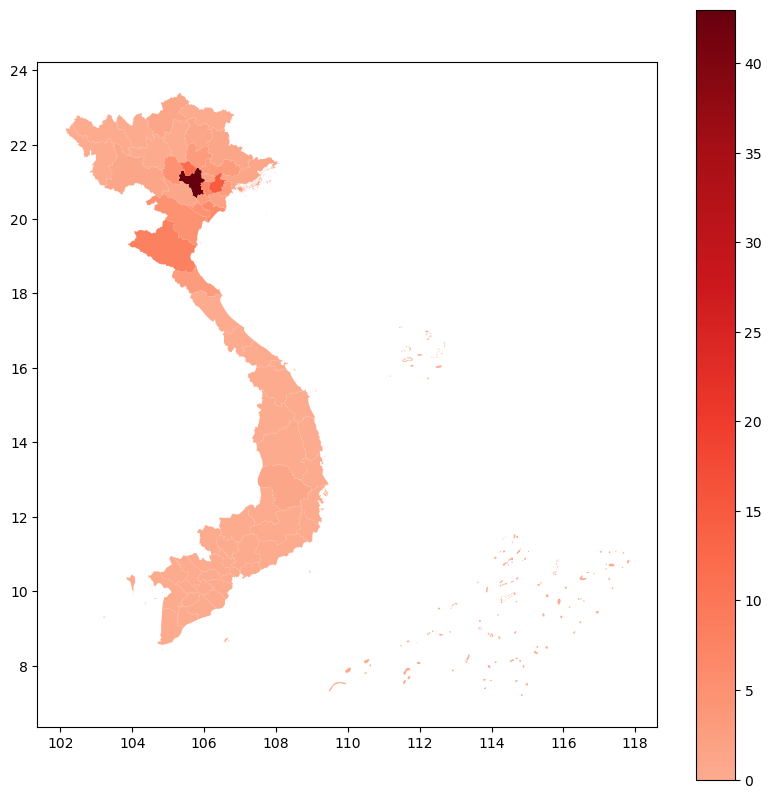

In [10]:
patients = list(df_years['2017']) + [0] * (len(gdf) - len(df))
gdf_2017 = gdf.sort_values(by='ADM1_EN')

gdf_2017.insert(0, 'Patient_2017', patients)

gdf_2017.plot(column='Patient_2017', cmap=cmap, figsize=(10, 10), legend=True)

### Timeline: 2018

<Axes: >

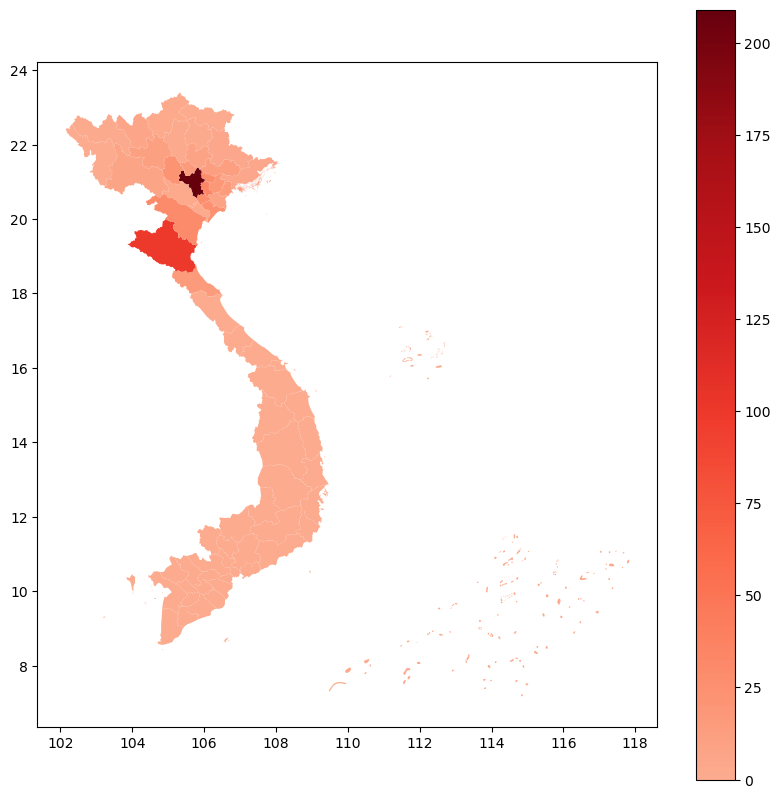

In [11]:
patients = list(df_years['2018']) + [0] * (len(gdf) - len(df))
gdf_2018 = gdf.sort_values(by='ADM1_EN')

gdf_2018.insert(0, 'Patient_2018', patients)

gdf_2018.plot(column='Patient_2018', cmap=cmap, figsize=(10, 10), legend=True)

### Timeline: 2019

<Axes: >

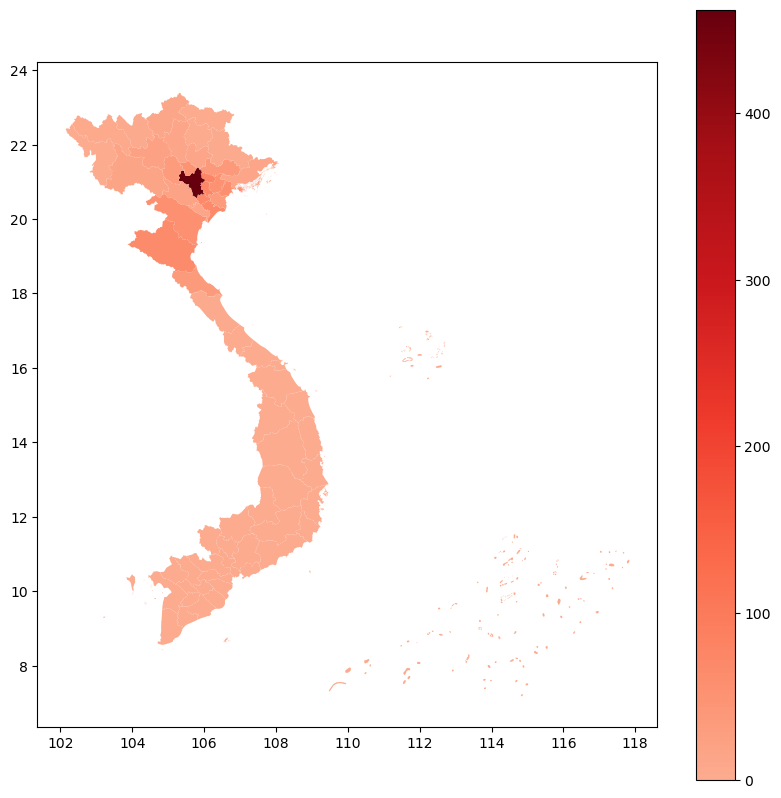

In [12]:
patients = list(df_years['2019']) + [0] * (len(gdf) - len(df))
gdf_2019 = gdf.sort_values(by='ADM1_EN')

gdf_2019.insert(0, 'Patient_2019', patients)

gdf_2019.plot(column='Patient_2019', figsize=(10, 10), cmap=cmap, legend=True)

### Comparison side-by-side

Text(0.5, 1.0, '2019')

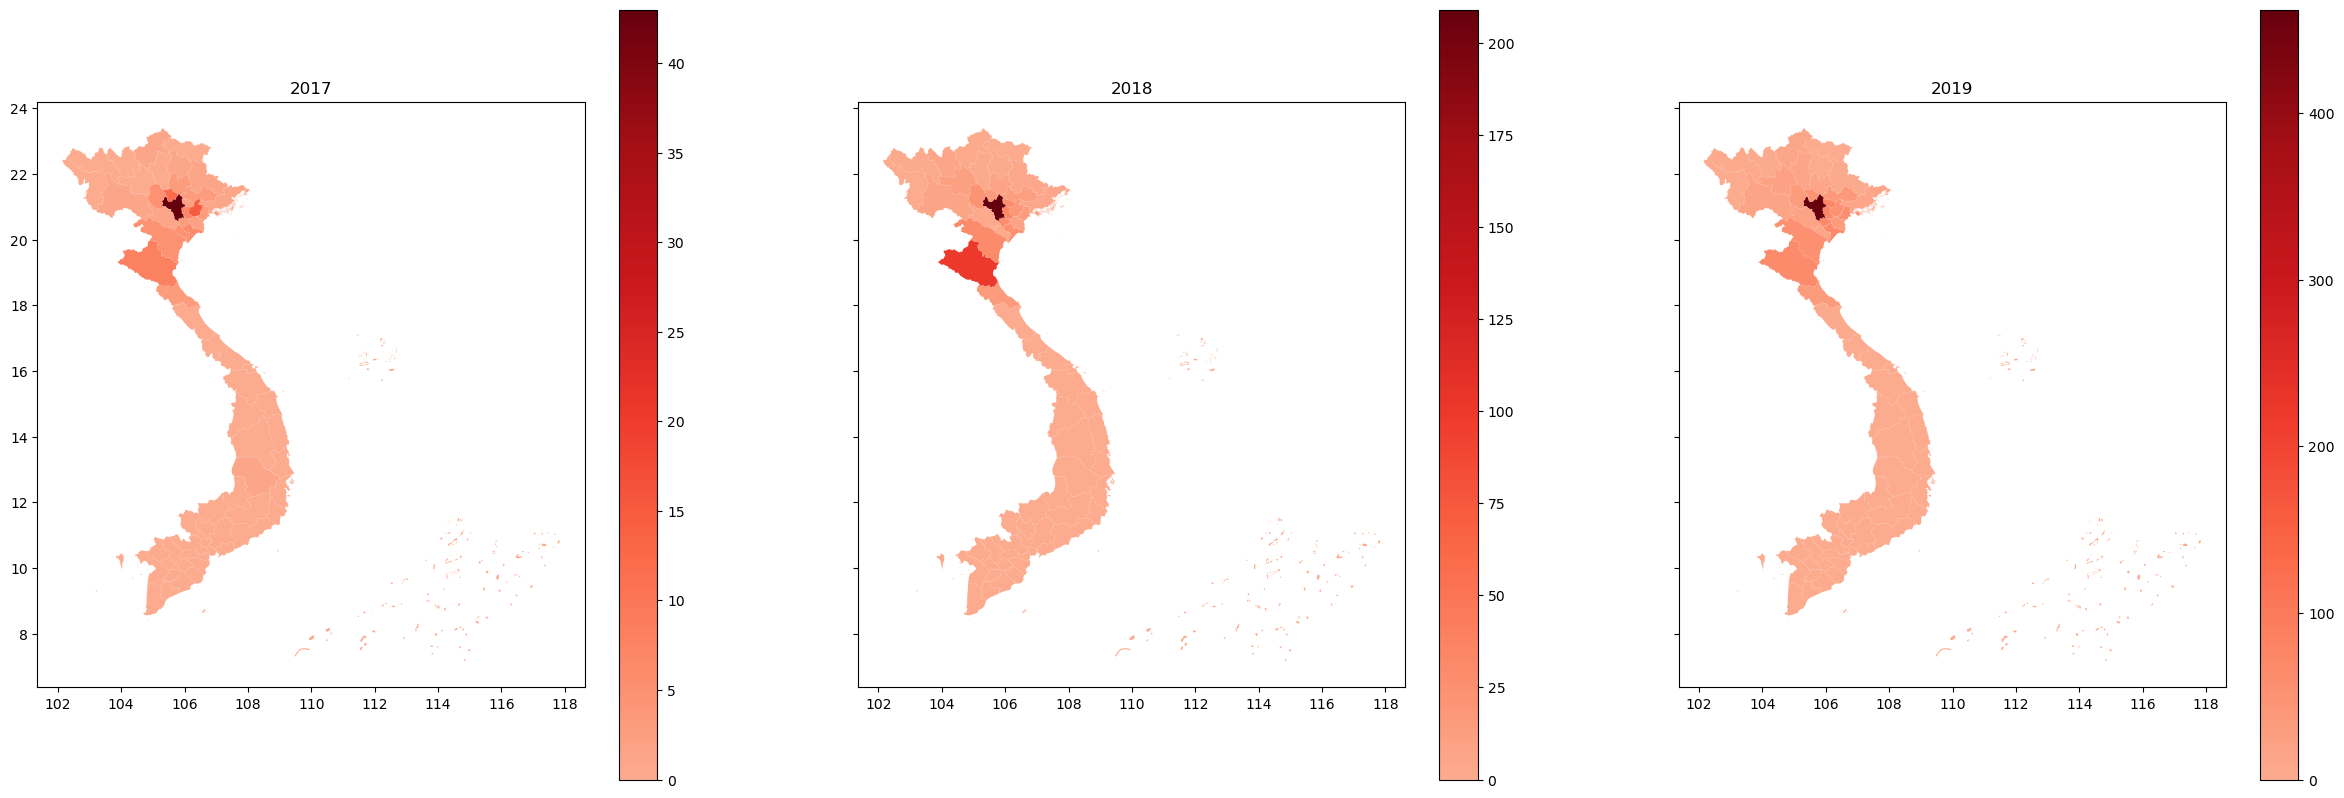

In [13]:
f, axes = plt.subplots(figsize=(30, 10), ncols=3, nrows=1, sharex=True, sharey=True)
gdf_2017.plot(column='Patient_2017', cmap=cmap, ax=axes[0], legend=True)
axes[0].set_title('2017')
gdf_2018.plot(column='Patient_2018', cmap=cmap, ax=axes[1], legend=True)
axes[1].set_title('2018')
gdf_2019.plot(column='Patient_2019', cmap=cmap, ax=axes[2], legend=True)
axes[2].set_title('2019')

## Histogram

In [14]:
# Load the data
data = pd.read_csv('../Data/out.csv')

### Critical vs. Non critical

In [15]:
import datetime
from matplotlib.dates import date2num

In [16]:
data['Clinical classification'].value_counts()
data['admission_date'] = pd.to_datetime(data['admission_date']).dt.date
data = data.sort_values(by='admission_date')
print(data['admission_date'])

1761    2017-07-09
1950    2017-07-11
93      2017-07-13
1999    2017-07-17
2007    2017-07-18
           ...    
256     2019-12-04
1648    2019-12-05
812     2019-12-10
1618    2019-12-10
770     2019-12-12
Name: admission_date, Length: 2072, dtype: object


1223 849


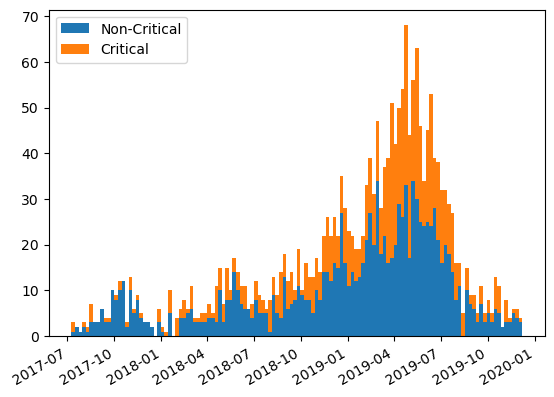

In [70]:
start, end = data['admission_date'].min(), data['admission_date'].max()
one_day = datetime.timedelta(days=1)

pack = [
        np.array(data[data['Clinical classification'] == 0][['admission_date']]).flatten(),
        # np.array([]).flatten(),
        np.array(data[data['Clinical classification'] == 1][['admission_date']]).flatten(),
    ]
print(pack[0].size, pack[1].size)

weeks = []
for i in range(0, (end - start).days + 1, 7):
    weeks.append(start + i * one_day)

numweek = date2num(weeks)

# Draw stacked bar chart, divided by week, based on Clinical classification
plt.hist(pack, bins=numweek, stacked=True, label=['Non-Critical', 'Critical'])
plt.legend()
plt.gcf().autofmt_xdate()

### Deceased vs. Alive

In [18]:
data['outcome_died'].value_counts()

0    2042
1      30
Name: outcome_died, dtype: int64

2042 30


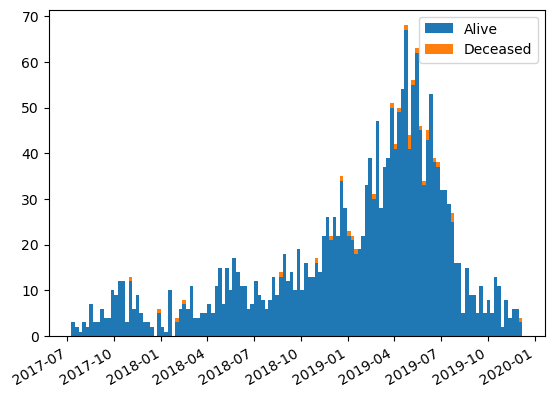

In [71]:
start, end = data['admission_date'].min(), data['admission_date'].max()
one_day = datetime.timedelta(days=1)

pack = [
        np.array(data[data['outcome_died'] == 0][['admission_date']]).flatten(),
        # np.array([]).flatten(),
        np.array(data[data['outcome_died'] == 1][['admission_date']]).flatten(),
    ]
print(pack[0].size, pack[1].size)

weeks = []
for i in range(0, (end - start).days + 1, 7):
    weeks.append(start + i * one_day)

numweek = date2num(weeks)

# Draw stacked bar chart, divided by week, based on Clinical classification
plt.hist(pack, bins=numweek, stacked=True, label=['Alive', 'Deceased'])
plt.legend()
plt.gcf().autofmt_xdate()